In [392]:
%matplotlib inline

In [393]:
# Import dependencies.
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pandas as pd
import os
import scipy.stats as sts

In [394]:
# load data.
city_data_to_load = os.path.join("Resources/city_data.csv")
ride_data_to_load = os.path.join("Resources/ride_data.csv")

In [395]:
# read the data as dataframes.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [396]:
# Merge the data into one dataframe for cities and rides
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban


In [397]:
# What are the city types?
city_types = pyber_data_df["type"].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [398]:
# create dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [399]:
# create ride counts per city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [400]:
# Find the average fares for each city within type of city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [401]:
# Find the average number of drivers per city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

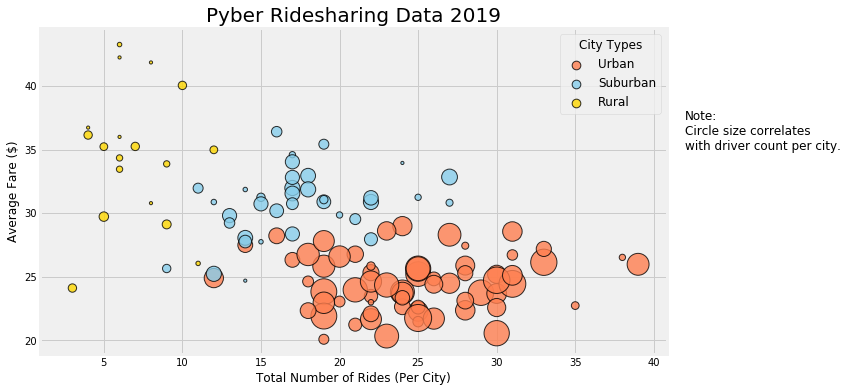

In [402]:
# Combine all the plots into one scatter 
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, linewidths=1, edgecolor="black", c="coral", alpha=.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, linewidths=1, edgecolor="black", c="skyblue", alpha=.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, linewidths=1, edgecolor="black", c="gold", alpha=.8, label="Rural")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ridesharing Data 2019", fontsize=20)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize=12)
plt.savefig("analysis/Fig1.png")
plt.show()

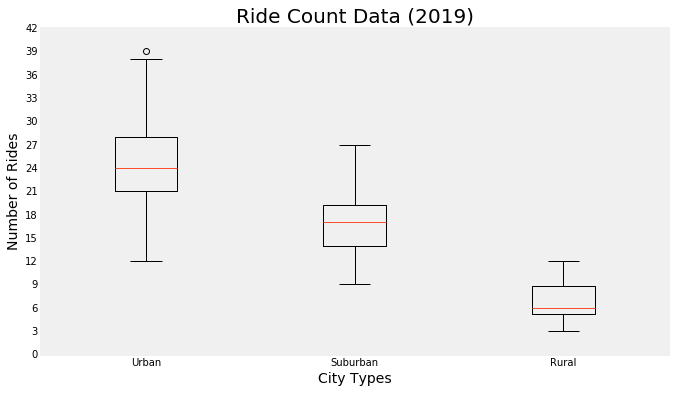

In [403]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

In [404]:
# Create fares variables per city type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

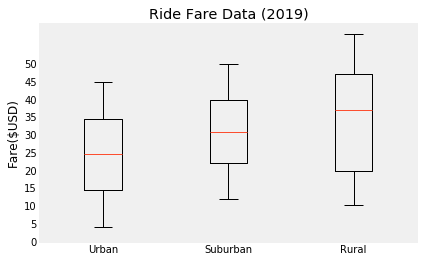

In [405]:
# Create a box-and-whisker plot for the fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

In [406]:
# create drivers variable per city type.
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

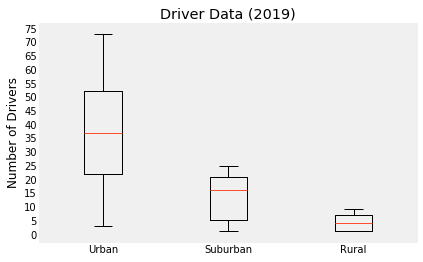

In [407]:
# Create a box-and-whisker plot for the driver data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

In [408]:
# Find percentages of fares by city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares = pyber_data_df["fare"].sum()
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

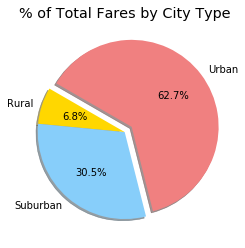

In [409]:
# Plot fare breakdown by city type. 
import matplotlib as mpl
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")
plt.show()

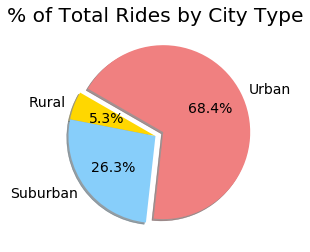

In [410]:
# Find ride percentages by city type and plot. 
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig6.png")
plt.show()

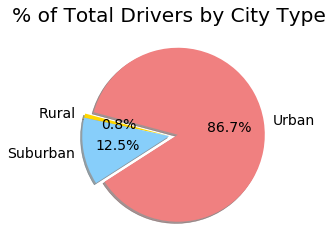

In [411]:
# Find driver percentages and plot.
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig7.png")
plt.show()

In [412]:
pyber_data_df.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban


In [413]:
# Find total number of rides per city type and create variable.
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides.dtypes

dtype('int64')

In [414]:
# Confirm there are duplicates when finding driver counts.
print(pyber_data_df["city"].value_counts())

West Angela        39
South Karenland    38
North Jason        35
Liumouth           33
Port Frank         33
                   ..
Penaborough         5
Randallchester      5
Newtonview          4
South Saramouth     4
Garzaport           3
Name: city, Length: 120, dtype: int64


In [415]:
# Find the total drivers per city type (counting unique city only once) and creating a variable. 
total_drivers = pyber_data_df.drop_duplicates(['city']).groupby('type').agg({'driver_count':'sum'})
total_drivers

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [416]:
# Find total sum of fares per city type and create variable. 
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [417]:
# Find average fare per ride. 
average_fare_ride = total_fares / total_rides
average_fare_ride.map("${:.2f}".format)

type
Rural       $34.62
Suburban    $30.97
Urban       $24.53
dtype: object

In [418]:
# Find average fare per driver. 
average_fare_driver = total_fares / total_drivers["driver_count"]
average_fare_driver.map("${:.2f}".format)

type
Rural       $55.49
Suburban    $39.50
Urban       $16.57
dtype: object

In [419]:
# Create Summary DataFrame and delete the index of "type". 
pyber_summary_df = pd.DataFrame({"Total Rides":total_rides, "Total Drivers":total_drivers["driver_count"], "Total Fares":total_fares.map("${:,.2f}".format), "Average Fare per Ride":average_fare_ride.map("${:.2f}".format), "Average Fare per Driver":average_fare_driver.map("${:.2f}".format)})
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [420]:
pyber_data_df.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban


In [421]:
# Rename Pyber Data columns and set index to "Date". 
pyber_data_df.columns = ["City", "Date", "Fare", "Ride ID", "No. Drivers", "City Type"]
pyber_data_df.set_index("Date", inplace=True)

In [422]:
pyber_fares_df = pyber_data_df[["City Type", "Fare"]].copy()
pyber_fares_df.index = pd.to_datetime(pyber_fares_df.index)
pyber_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [423]:
fares_city_date_df = pd.DataFrame(pyber_fares_df.groupby(["Date","City Type"]).sum()["Fare"])
fares_city_date_df.reset_index()
fares_city_date_df

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [424]:
fare_by_date = fares_city_date_df.pivot_table(index=['Date'], columns = ['City Type'],  values=['Fare'])
print(fare_by_date)

                     Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]


In [425]:
slice_fare_data_df = fare_by_date.loc["2019-01-01":"2019-04-28", "Fare"]
slice_fare_data_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [426]:
resampled_data_df = slice_fare_data_df.resample('W', level=0).sum()
resampled_data_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


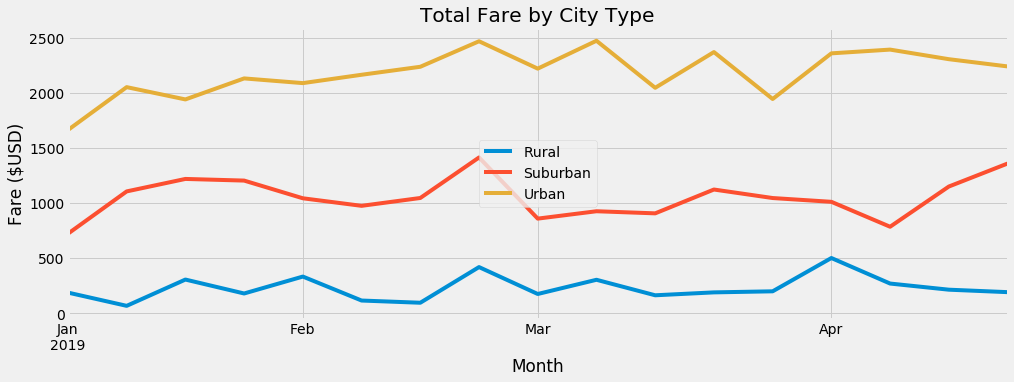

In [430]:
import matplotlib.style as style
plt.style.use('fivethirtyeight')
plt.plot = resampled_data_df.plot.line(figsize=(15,5))
plt.title("Total Fare by City Type")
plt.xlabel("Month")
plt.ylabel("Fare ($USD)")
plt.legend(loc="center")
plt.savefig("analysis/Fig8.png")
plt.show()